<a href="https://colab.research.google.com/github/LucasFreitas98/Data-Science/blob/main/data_visualization_DataScience_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 208 kB 5.2 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [2]:
import seaborn as sns
print(sns.__version__)

"""# Analisando as notas em geral"""

import pandas as pd

0.9.0


Media 3.501556983616962
Mediana 3.5


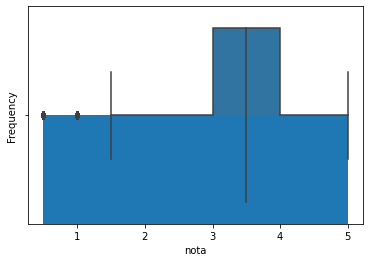

In [5]:
notas = pd.read_csv("ratings.csv")
notas.head()

notas.shape

notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

notas['nota'].unique()

notas['nota'].value_counts()

print("Media",notas['nota'].mean())
print("Mediana",notas['nota'].median())

notas.nota.head()

notas.nota.plot(kind='hist')

notas.nota.describe()

import seaborn as sns

sns.boxplot(notas.nota)

In [6]:
"""# Olhando os filmes"""

filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
"""# Analisando algumas notas especificas por filme"""

notas.query("filmeId==1").nota.mean()

notas.query("filmeId==2").nota.mean()

medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

medias_por_filme.plot(kind='hist')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

medias_por_filme.describe()

sns.distplot(medias_por_filme)

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

tmdb.original_language.unique() # categorica nominal

In [ ]:
# primeiro grau
# segundo grau
# terceiro grau
# 1 grau < 2 grau < 3 grau # categorica ordinal

# budget => orcamento => quantitativa continuo

# quantidade de votos => 1, 2, 3, 4, nao tem 2.5 votos.
# notas do movielens => 0.5, 1, 1.5, ... ,5 nao tem 2.7

tmdb["original_language"].value_counts().index

tmdb["original_language"].value_counts().values

contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

sns.barplot(x="original_language", y = "total", data = contagem_de_lingua)

sns.catplot(x = "original_language", kind="count", data = tmdb)

plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x="lingua", y="total", data = dados)

plt.pie(dados["total"], labels = dados["lingua"])

In [ ]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x = "original_language", kind="count",
              data = filmes_sem_lingua_original_em_ingles)